In [14]:
## imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

# company_index='5'
# company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
#             +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/Paper/img'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)

In [15]:
pc_flag = 'pro'

sentences = pd.\
read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all_px4.csv')

# sentences = pd.\
# read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all.csv')


sentences.shape

(344573, 15)

In [16]:
df = sentences.copy()

data_px = df['Px_Texts'].str.split().values
data_px


array([list(['close', 'hous']), list(['benefit']),
       list(['decent', 'employe']), ..., list(['flexibl']),
       list(['flexibl', 'schedul', 'flexibl_schedul']), list(['compens'])],
      dtype=object)

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_px) ##dictionary
print(len(id2word))
print(id2word)

# Create Corpus
texts = data_px 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  ##corpus

# View
print(corpus[:5])

17507
Dictionary(17507 unique tokens: ['close', 'hous', 'benefit', 'decent', 'employe']...)
[[(0, 1), (1, 1)], [(2, 1)], [(3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


In [18]:
def lda_viz(num_topics): 

    # %%time
    # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    num_topics = num_topics
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
    # %time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)


    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


    ##mallet model to lda model conversion
    optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

    # %%time
    # Visualize the topics
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    return vis
    # pyLDAvis.show(vis)

In [19]:
viz = lda_viz(10)
viz


Coherence Score:  0.3628195206247931


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.096415 -0.225534       1        1  10.283468
6      0.168890 -0.275752       2        1  10.220873
2      0.187200 -0.084554       3        1   9.987385
7     -0.329908 -0.076298       4        1   9.982250
8      0.066191  0.189166       5        1   9.952342
1      0.088897  0.150196       6        1   9.922860
5      0.002576  0.209790       7        1   9.922638
0     -0.090712  0.133331       8        1   9.912885
3      0.145355  0.078793       9        1   9.911664
4     -0.334903 -0.099139      10        1   9.903635, topic_info=     Category          Freq                Term         Total  loglift  \
28    Default  37475.000000                 pay  37475.000000  30.0000   
2     Default  56661.000000             benefit  56661.000000  29.0000   
25    Default  23363.000000                hour  23363.000000  28.0000   
13    Default  26351.000000               lunch  26351.000000  27.0000   
43    Default  21327.000000               peopl  21327.000000  26.0000   
10    Default  16660.000000               break  16660.000000  25.0000   
5     Default  21348.000000                free  21348.000000  24.0000   
101   Default  21306.000000            discount  21306.000000  23.0000   
45    Default  12722.000000             flexibl  12722.000000  22.0000   
41    Default  12203.000000             environ  12203.000000  21.0000   
9     Default  11574.000000                time  11574.000000  20.0000   
4     Default  10879.000000             employe  10879.000000  19.0000   
106   Default  10009.000000             schedul  10009.000000  18.0000   
16    Default   9365.000000              custom   9365.000000  17.0000   
161   Default  11894.000000               manag  11894.000000  16.0000   
103   Default  11635.000000              cowork  11635.000000  15.0000   
214   Default   8537.000000          free_lunch   8537.000000  14.0000   
40    Default   7995.000000          hour_lunch   7995.000000  13.0000   
59    Default   7728.000000            friendli   7728.000000  12.0000   
84    Default   7505.000000                paid   7505.000000  11.0000   
90    Default   7394.000000               learn   7394.000000  10.0000   
251   Default   7327.000000                team   7327.000000   9.0000   
118   Default   7116.000000                nice   7116.000000   8.0000   
82    Default   6859.000000            opportun   6859.000000   7.0000   
142   Default   6681.000000              advanc   6681.000000   6.0000   
99    Default   7579.000000                 fun   7579.000000   5.0000   
98    Default   6304.000000         pay_benefit   6304.000000   4.0000   
24    Default   6355.000000                 day   6355.000000   3.0000   
52    Default   5487.000000                food   5487.000000   2.0000   
483   Default   5291.000000                home   5291.000000   1.0000   
...       ...           ...                 ...           ...      ...   
123   Topic10   2460.055319         benefit_pay   2460.055319   2.3123   
94    Topic10   2405.988169          decent_pay   2405.988169   2.3123   
653   Topic10   1598.985895       excel_benefit   1598.985895   2.3123   
169   Topic10   1325.646415              packag   1325.646415   2.3123   
272   Topic10    852.058232      benefit_packag    852.058232   2.3123   
228   Topic10    607.754814      decent_benefit    607.754814   2.3123   
1950  Topic10    645.802068     compens_benefit    647.849992   2.3091   
2259  Topic10    457.568287           excel_pay    457.568287   2.3123   
607   Topic10    430.534712          pay_decent    430.534712   2.3123   
708   Topic10    324.402899              averag    324.402899   2.3123   
1465  Topic10    262.325801              listen    262.325801   2.3123   
885   Topic10    328.407873       benefit_manag    329.382341   2.3093   
1570  Topic10    236.293470               music    23

In [20]:
#parameter tuning (finding the best model)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, 
                                                  random_seed=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
#  Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_px, start=8, limit=30, step=2)

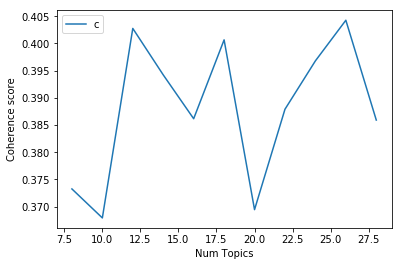

In [22]:
# Show graph
limit=30; start=8; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 8  has Coherence Value of 0.3733
Num Topics = 10  has Coherence Value of 0.3679
Num Topics = 12  has Coherence Value of 0.4028
Num Topics = 14  has Coherence Value of 0.3942
Num Topics = 16  has Coherence Value of 0.3862
Num Topics = 18  has Coherence Value of 0.4007
Num Topics = 20  has Coherence Value of 0.3694
Num Topics = 22  has Coherence Value of 0.3879
Num Topics = 24  has Coherence Value of 0.3968
Num Topics = 26  has Coherence Value of 0.4043
Num Topics = 28  has Coherence Value of 0.3859


In [24]:
vis = lda_viz(12)
vis


Coherence Score:  0.4083414436963457


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.172869 -0.313808       1        1  8.610076
5      0.134625 -0.245738       2        1  8.478690
0     -0.220125 -0.007025       3        1  8.377087
4     -0.267239 -0.019745       4        1  8.349940
8      0.103639  0.055812       5        1  8.295357
3      0.132608  0.148133       6        1  8.286010
9      0.121116  0.198573       7        1  8.284018
6     -0.266532  0.006329       8        1  8.279624
1      0.122278  0.148428       9        1  8.276193
2      0.088965 -0.144427      10        1  8.267435
11    -0.253804 -0.011901      11        1  8.265889
10     0.131600  0.185369      12        1  8.229681, topic_info=     Category          Freq            Term         Total  loglift  logprob
28    Default  37330.000000             pay  37330.000000  30.0000  30.0000
2     Default  57294.000000         benefit  57294.000000  29.0000  29.0000
43    Default  21331.000000           peopl  21331.000000  28.0000  28.0000
101   Default  21212.000000        discount  21212.000000  27.0000  27.0000
5     Default  20768.000000            free  20768.000000  26.0000  26.0000
13    Default  26345.000000           lunch  26345.000000  25.0000  25.0000
25    Default  23837.000000            hour  23837.000000  24.0000  24.0000
10    Default  16631.000000           break  16631.000000  23.0000  23.0000
45    Default  12612.000000         flexibl  12612.000000  22.0000  22.0000
9     Default  12101.000000            time  12101.000000  21.0000  21.0000
41    Default  12023.000000         environ  12023.000000  20.0000  20.0000
161   Default  11861.000000           manag  11861.000000  19.0000  19.0000
4     Default  10962.000000         employe  10962.000000  18.0000  18.0000
106   Default   9923.000000         schedul   9923.000000  17.0000  17.0000
16    Default   9292.000000          custom   9292.000000  16.0000  16.0000
103   Default  11446.000000          cowork  11446.000000  15.0000  15.0000
214   Default   8428.000000      free_lunch   8428.000000  14.0000  14.0000
40    Default   7981.000000      hour_lunch   7981.000000  13.0000  13.0000
84    Default   7848.000000            paid   7848.000000  12.0000  12.0000
59    Default   7614.000000        friendli   7614.000000  11.0000  11.0000
90    Default   7466.000000           learn   7466.000000  10.0000  10.0000
99    Default   7372.000000             fun   7372.000000   9.0000   9.0000
118   Default   7064.000000            nice   7064.000000   8.0000   8.0000
82    Default   6887.000000        opportun   6887.000000   7.0000   7.0000
142   Default   6708.000000          advanc   6708.000000   6.0000   6.0000
98    Default   6280.000000     pay_benefit   6280.000000   5.0000   5.0000
251   Default   7300.000000            team   7300.000000   4.0000   4.0000
483   Default   5433.000000            home   5433.000000   3.0000   3.0000
11    Default   5347.000000          health   5347.000000   2.0000   2.0000
135   Default   5225.000000           train   5225.000000   1.0000   1.0000
...       ...           ...             ...           ...      ...      ...
444   Topic12    989.146717            alot    989.146717   2.4974  -4.5129
34    Topic12    864.201868          depart    864.201868   2.4974  -4.6480
87    Topic12    839.212899        everyday    839.212899   2.4974  -4.6773
233   Topic12    795.482202           short    796.502304   2.4961  -4.7308
587   Topic12    684.073045  friendli_peopl    684.073045   2.4974  -4.8817
597   Topic12    652.836833      help_peopl    652.836833   2.4974  -4.9285
325   Topic12    616.394586             met    616.394586   2.4974  -4.9859
441   Topic12    821.512378            leav    824.552124   2.4937  -4.6986
842   Topic12    542.468884             job    542.468884   2.4974  -5.1137
1052  Topic12    504.985429   benefit_peopl    504.985429   2.4974  -5.1853
387   Topic12    486.24